# I-94 Interstate Highway Traffic
In this project we will be working with John Hogue's dataset about westbound traffic on I-94.  We will analyze the dataset and see if we can determine a few indicators of heavy traffic.  Indicators may consist of anything like weather type, time of the day, time of the week, etc.  Hopefully the analysis can help commuters or leisure drivers avoid potentially bad traffic given certain circumstances.

For the data collected, only westbound traffic is included and the main traffic recording station is approximately midway between Minneapolis and Saint Paul.  We need to consider that for our analysis this is very generalized for the areas around the station and only westbound traffic.

We'll begin by importing some necessary libraries and reading in the data and looking at a random sample of 10 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.sample(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
29340,None,272.49,0.00,0.0,75,Clouds,broken clouds,2016-12-21 23:00:00,1187
7978,None,291.93,0.00,0.0,48,Clouds,scattered clouds,2013-07-27 16:00:00,4377
169,None,287.36,0.00,0.0,90,Clouds,overcast clouds,2012-10-09 20:00:00,2775
8904,None,293.29,0.00,0.0,1,Clear,sky is clear,2013-09-12 11:00:00,4750
27104,None,289.59,1.16,0.0,100,Rain,moderate rain,2016-10-04 23:00:00,1138
34727,None,293.95,0.00,0.0,1,Rain,heavy intensity rain,2017-06-22 03:00:00,417
27002,None,293.16,0.00,0.0,24,Clouds,few clouds,2016-09-30 17:00:00,5028
4683,None,278.22,0.00,0.0,1,Mist,mist,2013-03-31 11:00:00,3610
33532,None,280.73,0.00,0.0,1,Clear,sky is clear,2017-05-11 07:00:00,6454
15280,None,300.56,0.00,0.0,40,Haze,haze,2014-07-06 12:00:00,4178


To get familiarized with the type of data and amount of columns with null values, we'll take a look at the datasets info.

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


It looks like there are no null values and only 8 columns.  This should help make the analysis easier.

Next let's begin visuzaling the data by plotting a histogram of the distribution of traffic volume and then looking at some basic statistics about the traffic volume.

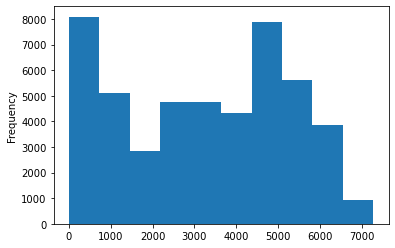

In [4]:
traffic['traffic_volume'].plot.hist()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the distribution, it seems that traffic can range quite a bit.  All the way from 0 to 7,280.  25% of the time traffic is less than 1,193 cars.  Where as, another 25% of the time traffic is more than 7,280 cars.

This could be potentially easily explained with a Day vs. Night cycle.  Let's visit this notion further.  Let's first convert the <code>'date_time'</code> to a <code>'datetime'</code> object.  Then we can isolate day vs night by dividing the dataset into two parts.  7 a.m. to 7 p.m. (daytime) and 7 p.m. to 7 a.m. (nighttime).

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
night = traffic.copy()[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

Now that we have the data separated.  We can graph histograms of the frequency of cars in the daytime vs nighttime.  We'll then look at some basic statistics again to gain further insight.

Text(0, 0.5, 'Frequency')

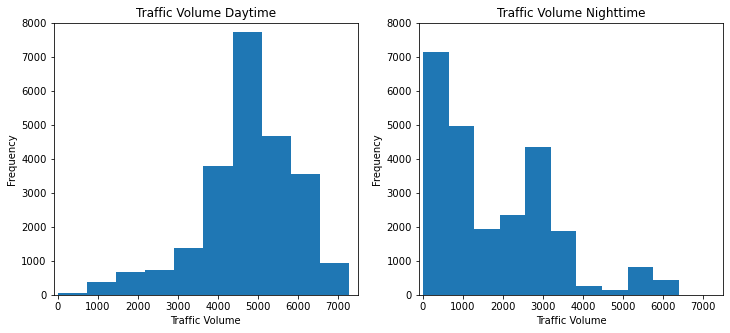

In [8]:
plt.figure(figsize = (12,5))
#subplot 1
plt.subplot(1,2,1)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
#subplot 2
plt.subplot(1,2,2)
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

In [9]:
print('Daytime:\n ',day['traffic_volume'].describe())
print('-'*40)
print('Nighttime:\n ',night['traffic_volume'].describe())

Daytime:
  count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
----------------------------------------
Nighttime:
  count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


It seems that traffic is very light at nighttime and pretty heavy during the day.  Since we're looking for strong indicators of heavy traffic, we can change the direction of our analysis to only focus on the data for daytime traffic.

As most people know from experience, certain times of the day or even parts of the year contribute to higher than normal traffic.  This can be anything like rush-hour, holidays, or even certain days of the week.  

We can investigate this further by grouping our data into different parameters.  We'll begin with Month and then follow with Day of the week and time of the day.

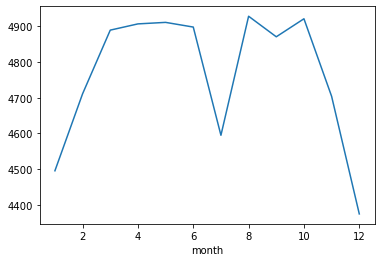

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Looking at the lineplot, it seems that colder months have dramatically less traffic.  Heavy snow and people generally wanting to be inside can be the explanation for this. 

However, the also seems to be a big dip in July which doesn't make sense.  July 4th weekend is typically the busiest travel holiday of the year.  We can analyze this further by looking year over year for the July months to see if we can find an explanation for this anomaly.

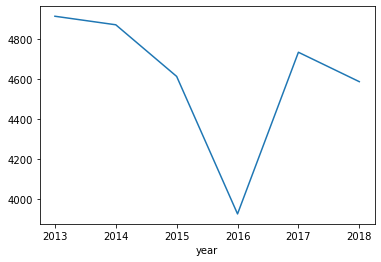

In [11]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july = only_july.groupby('year').mean()
only_july['traffic_volume'].plot.line()

As we can see from this, only 2016 had this major drop in traffic.  One explanation for this could be major road construction that may have shut down the entire highway.

Ultimately, it's safe to conclude that warmer months have more traffic than colder months.

Another time cycle to visit would be the day of the week.  Let's visit this further.

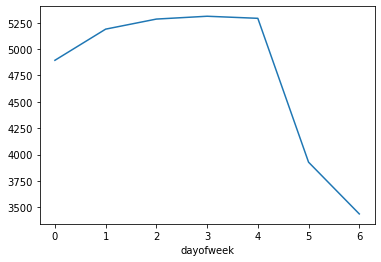

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
day_of_week = day.groupby('dayofweek').mean()
day_of_week['traffic_volume'].plot.line()

Looking at the above graph, it shows that Saturday and Sunday are the lowest traffic days.  This makes sense given that the work week is Monday-Friday.

Lastly, for our time cycle, let's take a look at time of the day as a traffic indicator and separate the work week from the weekend.

Text(0.5, 1.0, 'Traffic Volume by Hour - Weekend')

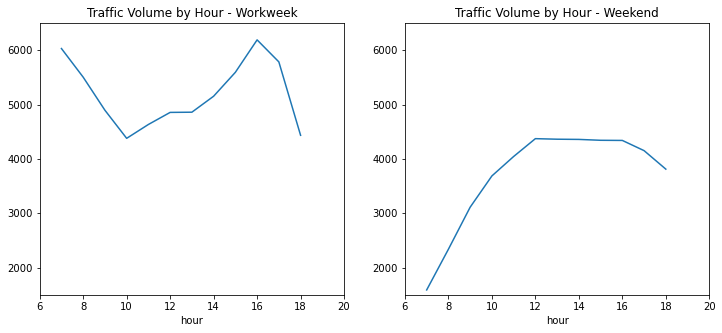

In [13]:
day['hour'] = day['date_time'].dt.hour
work_week = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
work_week_hour = work_week.groupby('hour').mean()
weekend_hour = weekend.groupby('hour').mean()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
work_week_hour['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume by Hour - Workweek')

plt.subplot(1,2,2)
weekend_hour['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume by Hour - Weekend')

Looking at the two graphs, it's clear that the morning rush to get to work around 6-8 a.m. and the evening rush to get home around 5pm-7pm are the busiest times.  Weekends, it seems the afternoon is the most busy.

What we have learned is pretty expected.
- Warmer months are busier than colder months
- Weekdays are busier than weekends
- Rush hour is the busiest time during the weekday

Another potential indicator of heavier than normal traffic would be weather.  Let's vist this next by looking for correlations with the weather columns.

In [14]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The only one that offers any bit of correlation is the temparture column with 0.12.  Let's visualize a scatter plot with this.

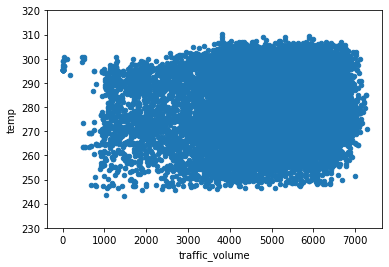

In [15]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(230, 320)
plt.show()

Looking at the scatter plot, it doesn't seem that tempature offers any reliable indicators to traffic volume.

Since we did correlations with the numerical columns, we should visit some of our categorical columns.  Two columns that may help will be the <code>'weather_main'</code> and <code>'weather_description'</code>.

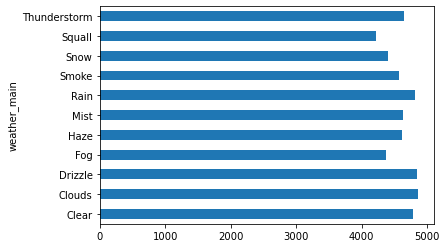

In [16]:
weather_main = day.groupby('weather_main').mean()
weather_desc = day.groupby('weather_description').mean()
weather_main['traffic_volume'].plot.barh()

From the bar plot, it doesn't seem that any specific type of weather affects the traffic patterns greatly.  Let's try weather description next. 

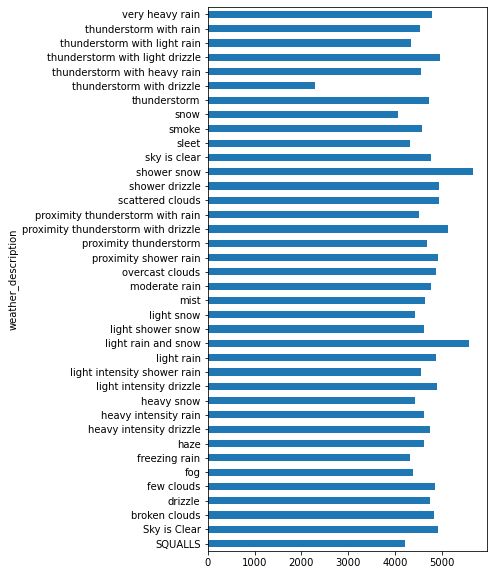

In [17]:
weather_desc['traffic_volume'].plot.barh(figsize = (5,10))

Here we can see two indicators of increased traffic (over 5000 cars).  Light rain and snow, as well as, shower snow.  This could be explained by more people taking their cars out due to the weather seeming not too bad, but fresh light snow and sleet are very slippery and this could cause people to drive slower or get in accidents more frequently.

# Conclusion
In this project we visualized some indicators of heavy traffic on I-94.  We learned that time is the biggest explanation for more traffic than normal.  Whether it is the work week vs weekend, rush hour, or the time of the year.  Ultimately, weather did not have too much of an impact besides light snow and sleet.

Unfortunately, in this project we didn't uncover any shocking explanations for higher than normal traffic that can help the savvy travel smarter.  It's best to avoid rush hour and peak summer months.